In [129]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='abdullah.irfan1032', api_key='S1igZKri6Bjk5Ex8dyRX')

df=pd.read_csv("C:/Users/User/Documents/Python Scripts/communities.data",sep=',',names=["state",
"county",
"community",
"communityname", 
"fold",
"population",
"householdsize",
"racepctblack",
"racePctWhite",
"racePctAsian",
"racePctHisp",
"agePct12t21",
"agePct12t29",
"agePct16t24",
"agePct65up",
"numbUrban",
"pctUrban",
"medIncome",
"pctWWage",
"pctWFarmSelf",
"pctWInvInc",
"pctWSocSec",
"pctWPubAsst",
"pctWRetire",
"medFamInc",
"perCapInc",
"whitePerCap",
"blackPerCap",
"indianPerCap",
"AsianPerCap",
"OtherPerCap",
"HispPerCap",
"NumUnderPov",
"PctPopUnderPov",
"PctLess9thGrade",
"PctNotHSGrad",
"PctBSorMore",
"PctUnemployed",
"PctEmploy",
"PctEmplManu",
"PctEmplProfServ",
"PctOccupManu",
"PctOccupMgmtProf",
"MalePctDivorce",
"MalePctNevMarr",
"FemalePctDiv",
"TotalPctDiv",
"PersPerFam",
"PctFam2Par",
"PctKids2Par",
"PctYoungKids2Par",
"PctTeen2Par",
"PctWorkMomYoungKids",
"PctWorkMom",
"NumIlleg",
"PctIlleg",
"NumImmig",
"PctImmigRecent",
"PctImmigRec5",
"PctImmigRec8",
"PctImmigRec10",
"PctRecentImmig",
"PctRecImmig5",
"PctRecImmig8",
"PctRecImmig10",
"PctSpeakEnglOnly",
"PctNotSpeakEnglWell",
"PctLargHouseFam",
"PctLargHouseOccup",
"PersPerOccupHous",
"PersPerOwnOccHous",
"PersPerRentOccHous",
"PctPersOwnOccup",
"PctPersDenseHous",
"PctHousLess3BR",
"MedNumBR",
"HousVacant",
"PctHousOccup",
"PctHousOwnOcc",
"PctVacantBoarded",
"PctVacMore6Mos",
"MedYrHousBuilt",
"PctHousNoPhone",
"PctWOFullPlumb",
"OwnOccLowQuart",
"OwnOccMedVal",
"OwnOccHiQuart",
"RentLowQ",
"RentMedian",
"RentHighQ",
"MedRent",
"MedRentPctHousInc",
"MedOwnCostPctInc",
"MedOwnCostPctIncNoMtg",
"NumInShelters",
"NumStreet",
"PctForeignBorn",
"PctBornSameState",
"PctSameHouse85",
"PctSameCity85",
"PctSameState85",
"LemasSwornFT",
"LemasSwFTPerPop",
"LemasSwFTFieldOps",
"LemasSwFTFieldPerPop",
"LemasTotalReq",
"LemasTotReqPerPop",
"PolicReqPerOffic",
"PolicPerPop",
"RacialMatchCommPol",
"PctPolicWhite",
"PctPolicBlack",
"PctPolicHisp",
"PctPolicAsian",
"PctPolicMinor",
"OfficAssgnDrugUnits",
"NumKindsDrugsSeiz",
"PolicAveOTWorked",
"LandArea",
"PopDens",
"PctUsePubTrans",
"PolicCars",
"PolicOperBudg",
"LemasPctPolicOnPatr",
"LemasGangUnitDeploy",
"LemasPctOfficDrugUn",
"PolicBudgPerPop",
"ViolentCrimesPerPop"])

In [130]:
df.head()
#Choosing only non-nominnal / predictive variables
#Dropping first 5 nominal 
df=df.iloc[:,5:127]
df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,?,0.02,0.12,0.45,?,?,?,?,0.00,?
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,?,0.01,0.21,0.02,?,?,?,?,0.00,?
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,?,0.02,0.39,0.28,?,?,?,?,0.00,?
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,?,0.04,0.09,0.02,?,?,?,?,0.00,?


In [131]:
matrix_df=df.as_matrix() 

In [132]:
np.shape(matrix_df)

(1994, 122)

In [133]:
df_na=df.replace('?',np.nan)
zeros_df=df_na.fillna(0)
zeros_df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0,0.02,0.12,0.45,0,0,0,0,0.00,0
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0,0.01,0.21,0.02,0,0,0,0,0.00,0
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0,0.02,0.39,0.28,0,0,0,0,0.00,0
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0,0.04,0.09,0.02,0,0,0,0,0.00,0


In [134]:
df_float=zeros_df.astype('float64') 

In [135]:
#Data converted into numeric only numeric columns, and missing values replaced with Mean
from scipy import stats
final_df=df_float.replace(0,df_float.mean(axis=0))
final_df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop
0,0.190000,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.90000,0.500000,0.320000,0.140000
1,0.057593,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.048952,0.02,0.12,0.45,0.026093,0.012272,0.11176,0.070461,0.094052,0.031209
2,0.057593,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.048952,0.01,0.21,0.02,0.026093,0.012272,0.11176,0.070461,0.094052,0.031209
3,0.040000,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.048952,0.02,0.39,0.28,0.026093,0.012272,0.11176,0.070461,0.094052,0.031209
4,0.010000,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.048952,0.04,0.09,0.02,0.026093,0.012272,0.11176,0.070461,0.094052,0.031209


In [106]:
#Converted to matrix
matrix=final_df.as_matrix()
matrix

array([[0.19      , 0.33      , 0.02      , ..., 0.5       , 0.32      ,
        0.14      ],
       [0.05759278, 0.16      , 0.12      , ..., 0.07046138, 0.09405216,
        0.03120863],
       [0.05759278, 0.42      , 0.49      , ..., 0.07046138, 0.09405216,
        0.03120863],
       ...,
       [0.16      , 0.37      , 0.25      , ..., 0.07046138, 0.91      ,
        0.28      ],
       [0.08      , 0.51      , 0.06      , ..., 0.07046138, 0.22      ,
        0.18      ],
       [0.2       , 0.78      , 0.14      , ..., 0.5       , 1.        ,
        0.13      ]])

In [125]:
#Making covariance matrix using Sklearn
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(matrix)
cov_mat=np.cov(matrix.T)

Text(0,0.5,'Cumulative explained variance')

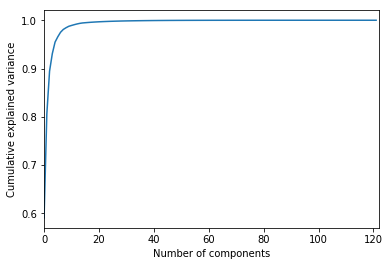

In [126]:
from sklearn.decomposition import PCA
pca = PCA(n_components=122).fit(cov_mat)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,122,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [127]:
#through numpy
import numpy as np
from numpy import linalg as LA
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])


Eigenvalues in descending order:
1.0268299975875492
0.7236214044146649
0.4049284425775406
0.2631080855722264
0.20863765662904854
0.14905963555662033
0.12935181630040188
0.10318261929954638
0.08004896630986116
0.07555817681678673
0.05565281773128112
0.054486641502032446
0.051755677159541456
0.04841285402549644
0.03913051586496316
0.03018605560785943
0.029208572397351782
0.027689081576414237
0.026934648173082474
0.024820895315418277
0.023686818140353273
0.022095102587557612
0.021166012514833007
0.019997509354668663
0.019271475041032236
0.018256598893187558
0.017290524135048526
0.016644222917185744
0.01624599468303011
0.015131578157582072
0.014626336374190268
0.013564612872036945
0.013400556086770548
0.012561143406006321
0.011929803623294719
0.011525535892374905
0.011190517238878256
0.01103921099431736
0.0107763975283622
0.010492888075248783
0.010252809395042648
0.009454333959993568
0.009237191745181205
0.008959871015172571
0.008811003868475293
0.008254168840393625
0.0077549229716318
0.00

In [128]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,80)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,80)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='selecting-principal-components')

#visualizing the data, the cut - off much more easy to spot. 

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~abdullah.irfan1032/0 or inside your plot.ly account where it is named 'selecting-principal-components'
